<a href="https://colab.research.google.com/github/RaghadAlnouri/Raghad/blob/master/R_Alnouri_Hyperparameter_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Choose 4 hyperparameters we have learned about in class
*  Create lists of the different options of hyperparameters
* Randomly sample from those lists and train a Keras model on MNIST
* Display the different loss and accuracy curves using matplotlib









The four hyperparameters we choose are:
- Number of hidden layers n = { 10, 50, 100 }
- L2 Regularization of Lambda = { 0.05, 0.01, 0.005, 0.001, 0.0001 }
- Dropout { with, without }
- Learning rates lr ={ 0.01, 0.005, 0.001, 0.0005 }

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
tf.__version__

'2.1.0'

In [0]:
mnist = keras.datasets.mnist

In [0]:
data = mnist.load_data()

In [0]:
X_train, y_train, X_test, y_test = data[0][0], data[0][1], data[1][0], data[1][1]
X_train = X_train / 255
X_test = X_test / 255
class_names = [str(i) for i in range(10)]
idx = np.arange(len(X_train))
np.random.seed(42)
np.random.shuffle(idx)
X_train, y_train, X_valid, y_valid = X_train[:-10000], y_train[:-10000], X_train[-10000:], y_train[-10000:]

In [0]:
import tensorflow.keras.backend as K
import random


In [0]:
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras import regularizers


def train_nn(lr, lamda, h, dropout):
  inputs = keras.Input(shape=(28,28,))
  x = Flatten()(inputs)
  y1 = Dense(h, activation='relu',  kernel_regularizer=regularizers.l2(lamda))(x)
  if dropout: 
    y1 = Dropout(0.5)(y1)
  y2 = Dense(h, activation='relu', kernel_regularizer=regularizers.l2(lamda))(y1)
  outputs = Dense(10, activation='softmax')(y2)

  func_model = keras.Model(inputs, outputs)


  func_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr),
              metrics=[keras.metrics.sparse_categorical_accuracy])

  func_model.summary()
  result = func_model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))

  pd.DataFrame(result.history).plot(figsize=(8, 5), ls='-')
  plt.grid(True)
  plt.gca()
  plt.show()

hyper-parameters:
lr: 0.01 lambda: 0.01 h: 10 dropout: True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0

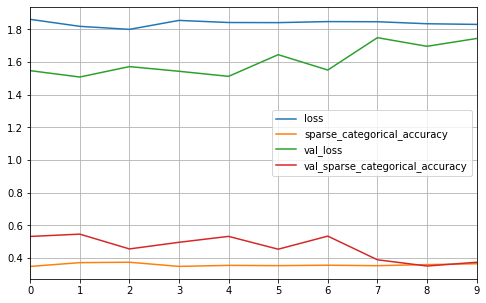

hyper-parameters:
lr: 0.005 lambda: 0.0001 h: 200 dropout: True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable p

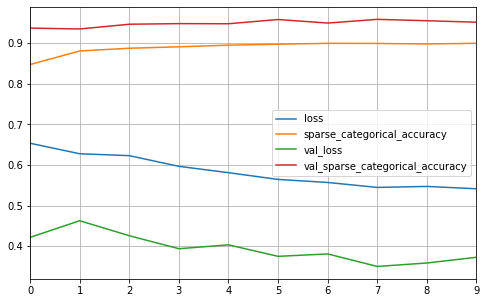

hyper-parameters:
lr: 0.0005 lambda: 0.005 h: 50 dropout: False
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/1

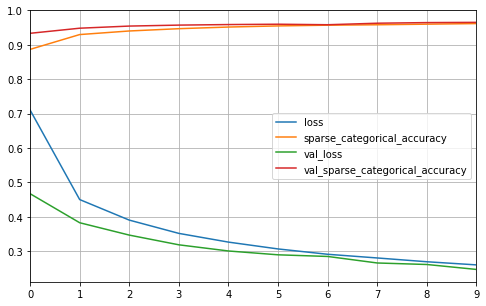

hyper-parameters:
lr: 0.01 lambda: 0.05 h: 50 dropout: False
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
5

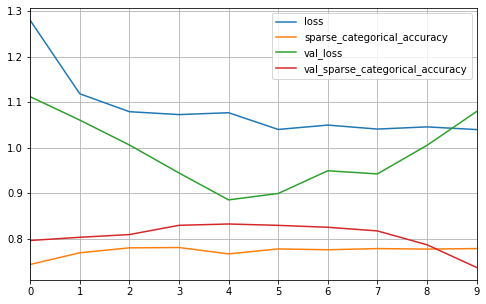

hyper-parameters:
lr: 0.01 lambda: 0.005 h: 100 dropout: False
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10

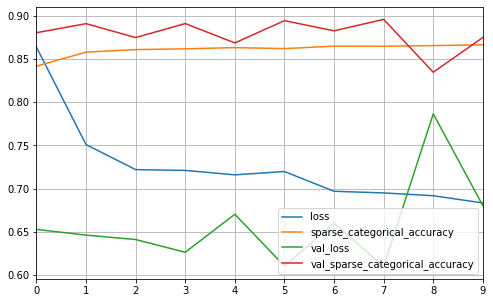

In [0]:
lr_vals =[0.01, 0.005, 0.001, 0.0005]
lamda_vals=[0.05, 0.01, 0.005, 0.001, 0.0001]
h_vals =[10, 50, 100, 200]
dropout_vals=[True,False]
for _ in range(5):
  K.clear_session()
  lr = random.choice(lr_vals)
  lamda = random.choice(lamda_vals)
  h= random.choice(h_vals)
  dropout=random.choice(dropout_vals)
  print("hyper-parameters:")
  print("lr:", lr, "lambda:", lamda, "h:", h, "dropout:", dropout)
  train_nn(lr, lamda, h, dropout)